# Self-Driving Car Engineer Nanodegree


## Project: **Finding Lane Lines on the Road** 

### Import Packages

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

### Read in an Image

This image is: <class 'numpy.ndarray'> with dimensions: (720, 1280, 3)


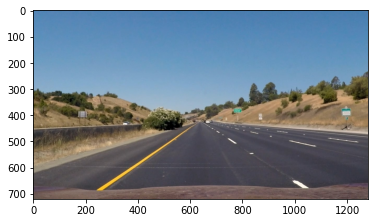

In [4]:
#reading in an image
image = mpimg.imread('test_images/straight_lines1.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

### Camera Calibration
Briefly state how you computed the camera matrix and distortion coefficients. Provide an example of a distortion corrected calibration image.

In [27]:
# Code references: 
# Udacity Self-Driving Cars Nanodegree
# https://www.learnopencv.com/camera-calibration-using-opencv/

# Read in the saved camera matrix and distortion coefficients

def calibration_points(checkerboard):

    # Creating vector to store vectors of 3D points for each checkerboard image
    objpoints = []

    # Creating vector to store vectors of 2D points for each checkerboard image
    imgpoints = []

    # World coordinates for 3D points
    objp = np.zeros((1, checkerboard[0] * checkerboard[1], 3), np.float32)
    objp[0,:,:2] = np.mgrid[0:checkerboard[0], 0:checkerboard[1]].T.reshape(-1, 2)

    # loop through calibration files
    for file in range(1,21,1):
        filename = 'camera_cal/calibration'+str(file)+'.jpg'
        img = mpimg.imread(filename)

        # Convert to grayscale
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # Find corners
        ret, corners = cv2.findChessboardCorners(gray, (checkerboard[0], checkerboard[1]), None)
        # If corners found, add object points, image points
        if ret == True:
            imgpoints.append(corners)
            objpoints.append(objp)

            #draw and display the corners
            img = cv2.drawChessboardCorners(img, (checkerboard[0], checkerboard[1]), corners, ret)

            plt.imshow(img)
            plt.show()
            
    return imgpoints, objpoints

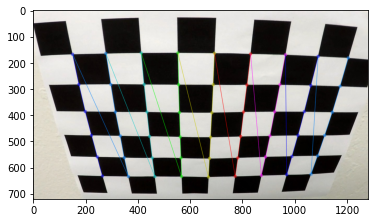

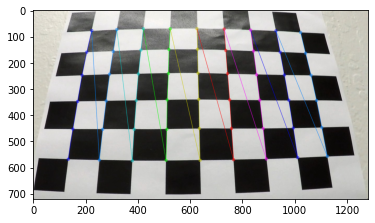

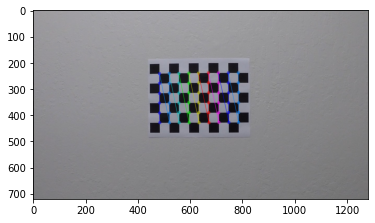

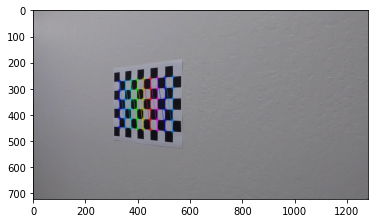

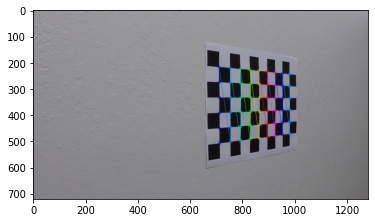

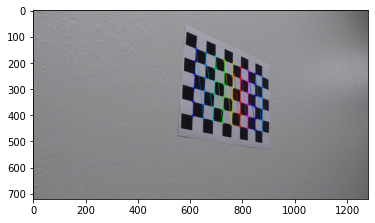

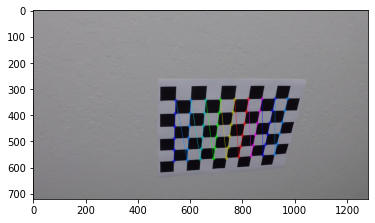

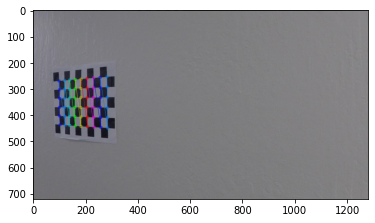

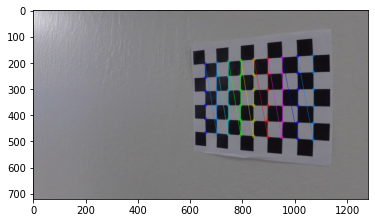

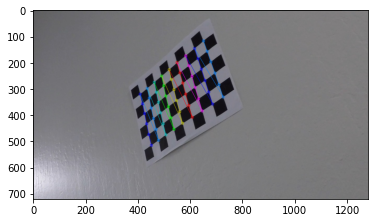

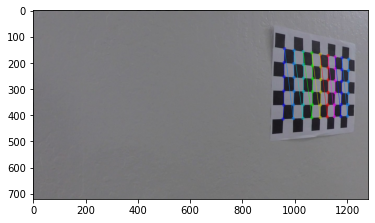

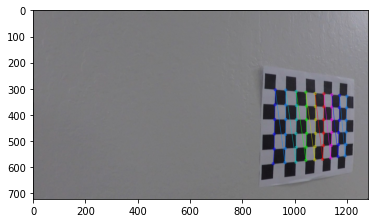

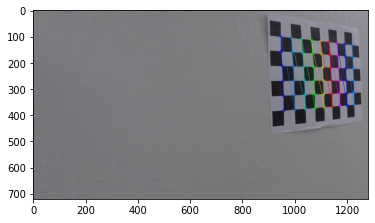

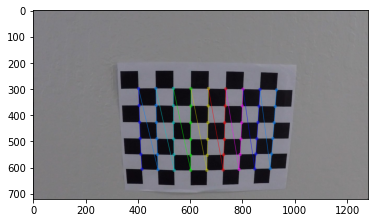

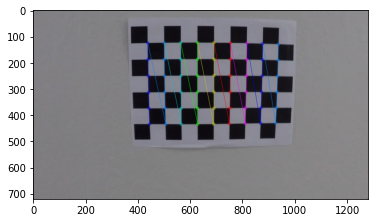

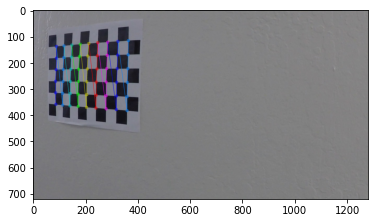

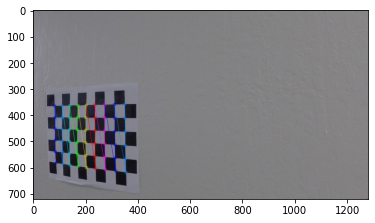

In [28]:
# Determine image points and object points of checkerboard photos
imgpoints, objpoints = calibration_points(checkerboard = (6,9))

In [29]:
# Obtain camera calibration matrix according to given checkerboard image points and object points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints,imgpoints,gray.shape[::-1],None,None)

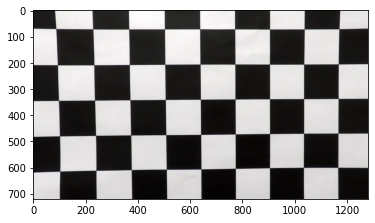

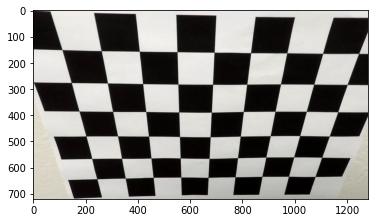

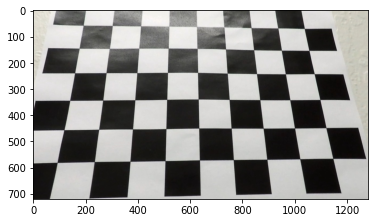

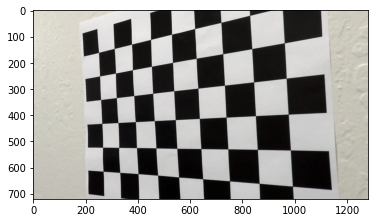

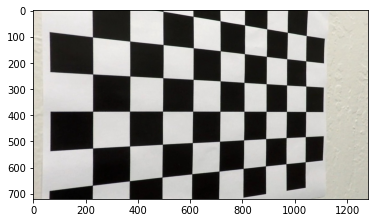

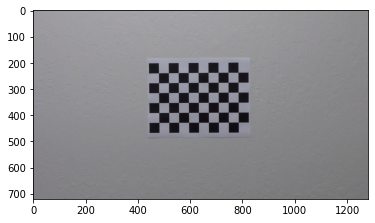

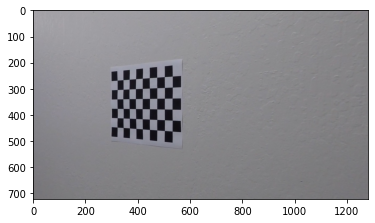

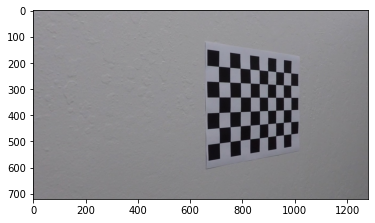

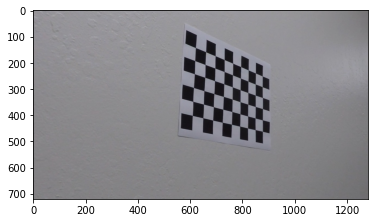

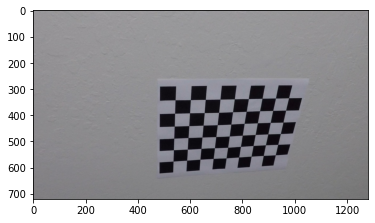

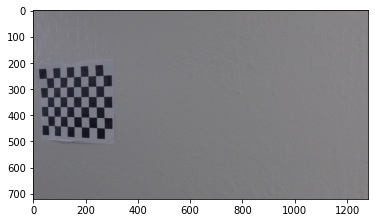

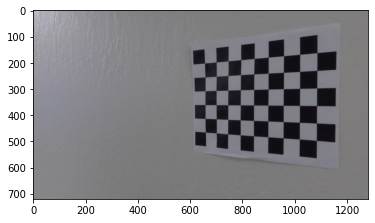

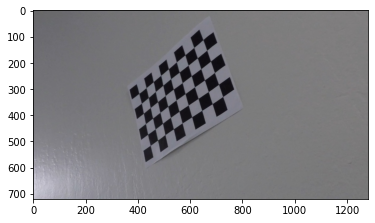

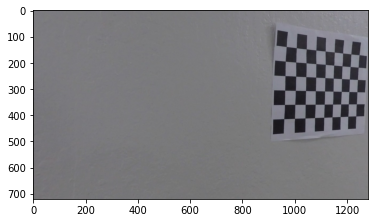

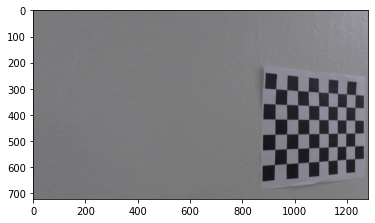

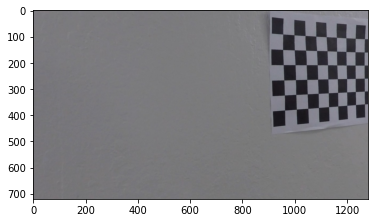

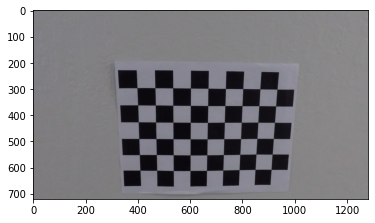

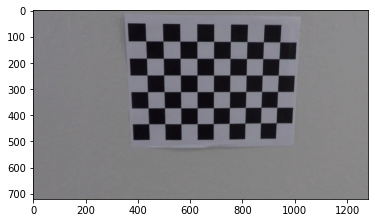

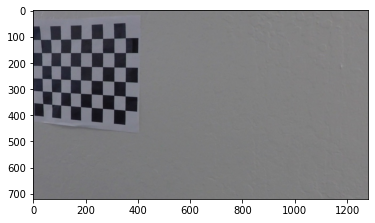

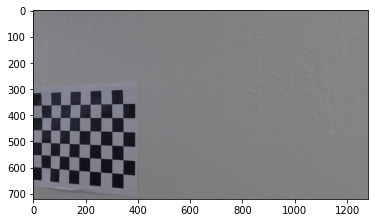

In [30]:
# Undistort images to test camera calibration effectiveness

# loop through calibration files
for file in range(1,21,1):
    filename = 'camera_cal/calibration'+str(file)+'.jpg'
    img = mpimg.imread(filename)
    img = cv2.undistort(img, mtx, dist, None, mtx)
    plt.imshow(img)
    plt.show()

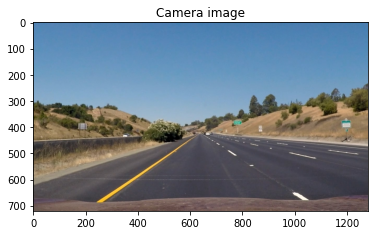

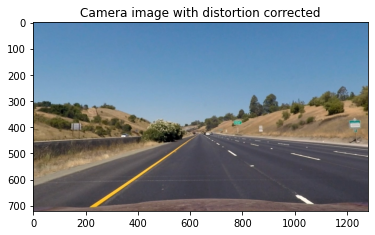

In [37]:
# Undistort test image to test camera calibration effectiveness

img = mpimg.imread('test_images/straight_lines1.jpg')
plt.imshow(img)
plt.title("Camera image")
plt.show()
img = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(img)
plt.title("Camera image with distortion corrected")
plt.show()

### Apply Inveserse Perspective Transform

Apply inverse perspective transform on undistorted image.
Inverse Perspective Mapping (IPM), we want to produce a birds-eye view image of the scene from the front-facing image plane.

The image obtained by the car camera contains a large non-road area, such as sky, trees on roadside, etc. Globally processing of the image will increase the computational complexity and reduce the real-time capability.

Furthermore, the invalid area will interfere the lane information and affect the detection accuracy. Therefore, the valid region within the image should be selected to eliminate the invalid information.

Ref: https://medium.com/ai-in-plain-english/inverse-perspective-transformation-b62b5eedb44a

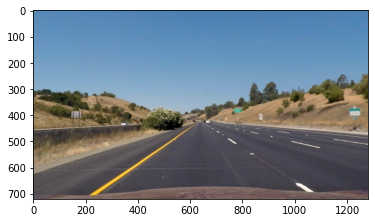

In [40]:
plt.imshow(img)

In [42]:
img.shape

(720, 1280, 3)

In [ ]:
# Locate points of the image which you want to transform 
    pts1 = np.float32([[0, 260], [640, 260], [0, 400], [640, 400]]) 
    pts2 = np.float32([[0, 0], [400, 0], [0, 640], [400, 640]]) 
      
    # Apply Perspective Transform Algorithm 
    matrix = cv2.getPerspectiveTransform(pts1, pts2) 
    result = cv2.warpPerspective(frame, matrix, (500, 600)) 
    # Wrap the transformed image 
  
    cv2.imshow('frame', frame) # Inital Capture 
    cv2.imshow('frame1', result) # Transformed Capture 

### Pipeline (test images)

Provide an example of a distortion-corrected image.

Describe how (and identify where in your code) you used color transforms, gradients or other methods to create a thresholded binary image. Provide an example of a binary image result.

Describe how (and identify where in your code) you performed a perspective transform and provide an example of a transformed image.

Describe how (and identify where in your code) you identified lane-line pixels and fit their positions with a polynomial?

Describe how (and identify where in your code) you calculated the radius of curvature of the lane and the position of the vehicle with respect to center.

Provide an example image of your result plotted back down onto the road such that the lane area is identified clearly.

### Pipeline (video)

Provide a link to your final video output. Your pipeline should perform reasonably well on the entire project video (wobbly lines are ok but no catastrophic failures that would cause the car to drive off the road!)

Briefly discuss any problems / issues you faced in your implementation of this project. Where will your pipeline likely fail? What could you do to make it more robust?

## Ideas for Lane Detection Pipeline

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images  
`cv2.cvtColor()` to grayscale or change color  
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

**Check out the OpenCV documentation to learn about these and discover even more awesome functionality!**

## Helper Functions

Below are some helper functions to help get you started. They should look familiar from the lesson!

In [231]:
import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    `vertices` should be a numpy array of integer points.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=5):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def normalize(array):
    mean = np.mean(array, axis=0)
    sd=np.std(array,axis=0)
    
    array=[x for x in array if (x > mean - 1*sd)]
    array=[x for x in array if (x < mean + 1*sd)]
    
    return np.mean(array)
            
def best_fit(lines):
    
    left_lane=lines[lines[:,:,0]<500]    
    left_slopes=(left_lane[:,3]-left_lane[:,1])/(left_lane[:,2]-left_lane[:,0])
    left_lane=left_lane[np.where(left_slopes<0)]
    left_slopes=left_slopes[left_slopes<0]
    left_slopes_median=normalize(left_slopes)
    left_lane = np.vstack((left_lane[:,2:], left_lane[:,:2])) #stack the lane lines
    left_lane_y0 = normalize((left_lane[:,1:])-(left_lane[:,:1]*left_slopes_median))
    left_lane_y1 = 320
    left_lane_line=np.array([[    
        int((540-left_lane_y0)/(left_slopes_median)),
        540,
        int((left_lane_y1-left_lane_y0)/left_slopes_median),
        left_lane_y1]])
    
    right_lane=lines[lines[:,:,0]>500]
    right_slopes=(right_lane[:,3]-right_lane[:,1])/(right_lane[:,2]-right_lane[:,0])
    right_lane=right_lane[np.where(right_slopes>0)]
    right_slopes=right_slopes[right_slopes>0]
    right_slopes_median=normalize(right_slopes)    
    right_lane = np.vstack((right_lane[:,2:], right_lane[:,:2])) #stack the lane lines    
    right_lane_y0 = normalize((right_lane[:,1:])-(right_lane[:,:1]*right_slopes_median))
    right_lane_y1 = 320

    right_lane_line=np.array([[
        int((540-right_lane_y0)/(right_slopes_median)),
        540,
        int((right_lane_y1-right_lane_y0)/right_slopes_median),
        right_lane_y1]])
    
    best_fit_lanes=np.vstack([(left_lane_line,right_lane_line)])
    
    return best_fit_lanes
        
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap, lane_fitting, frame, old_lines):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    if lane_fitting==True:
        lines=best_fit(lines)

    if frame==True:
        lines=((old_lines+lines)/2)
        lines=lines.astype(int)
        
    draw_lines(line_img, lines)
    return line_img, lines


def weighted_img(img, initial_img, α=0.8, β=1., γ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + γ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, γ)

In [232]:
lines3=lines2*1.1

In [233]:
lines2.astype(int)

array([[[ 388, 1080,  936,  640]],

       [[1730, 1080, 1008,  640]]])

## Test Images

Build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

In [234]:
import os
os.listdir("test_images/")

['solidWhiteCurve.jpg',
 'solidWhiteRight.jpg',
 'solidYellowCurve.jpg',
 'solidYellowCurve2.jpg',
 'solidYellowLeft.jpg',
 'whiteCarLaneSwitch.jpg']

## Build a Lane Finding Pipeline



Build the pipeline and run your solution on all test_images. Make copies into the `test_images_output` directory, and you can use the images in your writeup report.

Try tuning the various parameters, especially the low and high Canny thresholds as well as the Hough lines parameters.

In [235]:
# TODO: Build your pipeline that will draw lane lines on the test_images
# then save them to the test_images_output directory.

In [236]:
def pipeline (img_dir, lane_fitting, frame, old_lines):
    
    initial_img = mpimg.imread(img_dir)
    img = mpimg.imread(img_dir)

    low_threshold=80
    high_threshold=240
    
    img = grayscale(img)
    
    img = canny(img, low_threshold, high_threshold) #image with canny

    kernel_size = 1

    img = gaussian_blur(img, kernel_size) #image with kernel

    region_interest = np.copy(img)

    vertices = np.array([[(50,540),(950,540),(510,320),(460,320)]],dtype=np.int32)

    img=region_of_interest(img,vertices)

    # Make a blank the same size as our image to draw on
    rho = 1 # distance resolution in pixels of the Hough grid
    theta = np.pi/180 # angular resolution in radians of the Hough grid
    threshold = 2     # minimum number of votes (intersections in Hough grid cell)
    min_line_len = 12 #minimum number of pixels making up a line
    max_line_gap = 3    # maximum gap in pixels between connectable line segments

    img, lines = hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap, lane_fitting, frame, old_lines)
    
    img_overlay=weighted_img(img, initial_img, α=0.8, β=1., γ=0.)

    return img_overlay, lines

RESULTS WITHOUT LANE FITTING


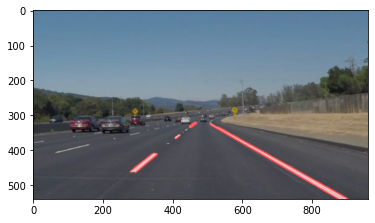

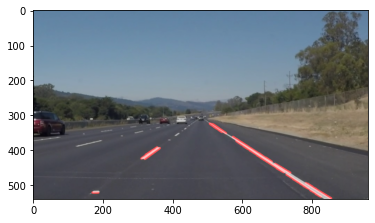

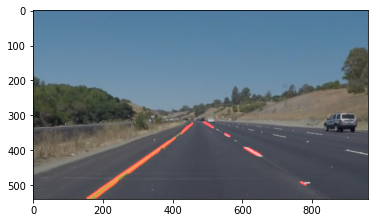

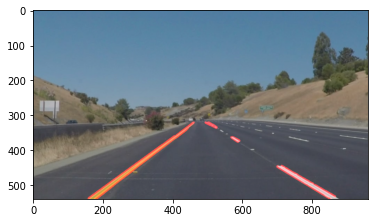

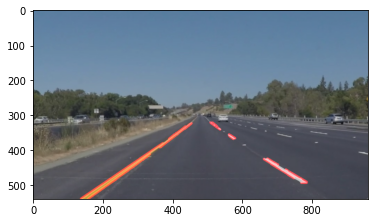

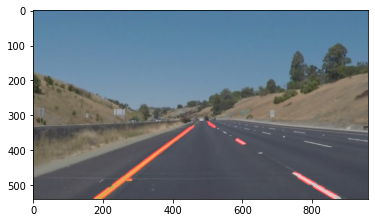

RESULTS WITH LANE FITTING
[[[175 540 468 320]]

 [[897 540 504 320]]]


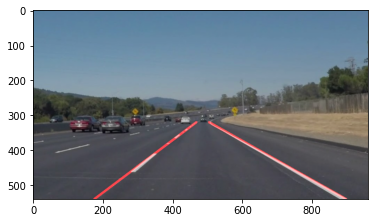

[[[165 540 464 320]]

 [[876 540 497 320]]]


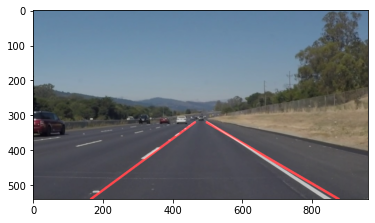

[[[168 540 463 320]]

 [[878 540 485 320]]]


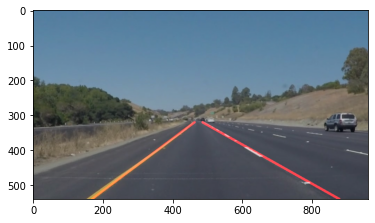

[[[168 540 462 320]]

 [[877 540 490 320]]]


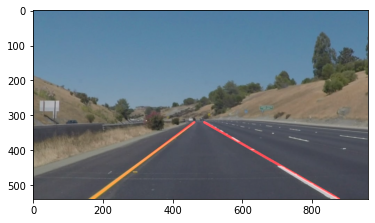

[[[162 540 460 320]]

 [[865 540 498 320]]]


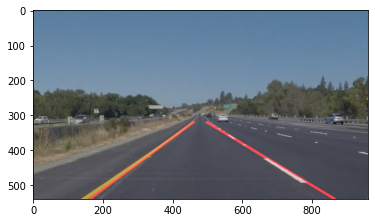

[[[174 540 466 320]]

 [[875 540 497 320]]]


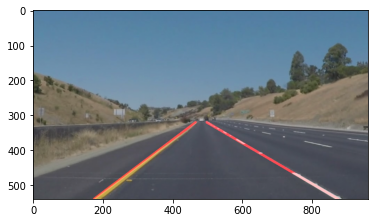

In [237]:
import time

print("RESULTS WITHOUT LANE FITTING")
frame=False
lane_fitting=False
old_lines=[]
for image in range(len(os.listdir("test_images/"))):
    img_dir = "test_images/"+os.listdir("test_images")[image]
    img_pipeline, lines = pipeline(img_dir, lane_fitting, frame, old_lines)
    plt.imshow(img_pipeline, cmap='gray')
    plt.pause(0.2) 

print("RESULTS WITH LANE FITTING")
frame=False
lane_fitting=True
old_lines=[]
for image in range(len(os.listdir("test_images/"))):
    img_dir="test_images/"+os.listdir("test_images")[image]
    img_pipeline, lines = pipeline(img_dir, lane_fitting, frame, old_lines)
    
    old_lines = lines
    frame=True
    plt.imshow(img_pipeline, cmap='gray')
    print(lines)
    plt.pause(0.2) 
    

## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

**Note: if you get an import error when you run the next cell, try changing your kernel (select the Kernel menu above --> Change Kernel). Still have problems? Try relaunching Jupyter Notebook from the terminal prompt. Also, consult the forums for more troubleshooting tips.**

**If you get an error that looks like this:**
```
NeedDownloadError: Need ffmpeg exe. 
You can download it by calling: 
imageio.plugins.ffmpeg.download()
```
**Follow the instructions in the error message and check out [this forum post](https://discussions.udacity.com/t/project-error-of-test-on-videos/274082) for more troubleshooting tips across operating systems.**

In [238]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [239]:
def process_image(img):
    
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    initial_img=img.copy()
    low_threshold=50
    high_threshold=150
    
    img = grayscale(img)
    
    img = canny(img, low_threshold, high_threshold) #image with canny

    kernel_size = 1

    img = gaussian_blur(img, kernel_size) #image with kernel

    region_interest = np.copy(img)

    vertices = np.array([[(50,540),(950,540),(510,320),(460,320)]],dtype=np.int32)

    img=region_of_interest(img,vertices)

    # Make a blank the same size as our image to draw on
    rho = 1 # distance resolution in pixels of the Hough grid
    theta = np.pi/180 # angular resolution in radians of the Hough grid
    threshold = 3     # minimum number of votes (intersections in Hough grid cell)
    min_line_len = 12#15 #minimum number of pixels making up a line
    max_line_gap = 3#3    # maximum gap in pixels between connectable line segments
        
    img, lines = hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap, lane_fitting, frame, old_lines)
        
    img_overlay=weighted_img(img, initial_img, α=0.8, β=1., γ=0.)

    return img_overlay

Let's try the one with the solid white lane on the right first ...

In [240]:
white_output = 'test_videos_output/solidWhiteRight.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)


                                                                                                                    
t:   1%|▌                                                                | 2/251 [08:05<16:48:16, 242.96s/it, now=None]
                                                                                                                    
t:   2%|█▌                                                                   | 5/221 [00:00<00:04, 49.86it/s, now=None]

Moviepy - Building video test_videos_output/solidWhiteRight.mp4.
Moviepy - Writing video test_videos_output/solidWhiteRight.mp4



                                                                                                                       
                                                                                                                    
t:   1%|▌                                                                | 2/251 [08:09<16:55:35, 244.72s/it, now=None]
                                                                                                                    
t:   1%|▌                                                                | 2/251 [08:09<16:55:35, 244.72s/it, now=None]

Moviepy - Done !
Moviepy - video ready test_videos_output/solidWhiteRight.mp4
Wall time: 3.52 s


Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [241]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

## Improve the draw_lines() function

**At this point, if you were successful with making the pipeline and tuning parameters, you probably have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)?  Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform. As mentioned previously, try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines. You can see an example of the result you're going for in the video "P1_example.mp4".**

**Go back and modify your draw_lines function accordingly and try re-running your pipeline. The new output should draw a single, solid line over the left lane line and a single, solid line over the right lane line. The lines should start from the bottom of the image and extend out to the top of the region of interest.**

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [242]:
yellow_output = 'test_videos_output/solidYellowLeft.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4').subclip(0,5)
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)


                                                                                                                    
t:   1%|▌                                                                | 2/251 [08:09<16:56:21, 244.90s/it, now=None]
                                                                                                                    
t:   1%|▍                                                                    | 4/681 [00:00<00:16, 39.89it/s, now=None]

Moviepy - Building video test_videos_output/solidYellowLeft.mp4.
Moviepy - Writing video test_videos_output/solidYellowLeft.mp4



                                                                                                                       
                                                                                                                    
t:   1%|▌                                                                | 2/251 [08:21<17:19:39, 250.52s/it, now=None]
                                                                                                                    
t:   1%|▌                                                                | 2/251 [08:21<17:19:39, 250.52s/it, now=None]

Moviepy - Done !
Moviepy - video ready test_videos_output/solidYellowLeft.mp4
Wall time: 11.2 s


In [243]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Writeup and Submission

If you're satisfied with your video outputs, it's time to make the report writeup in a pdf or markdown file. Once you have this Ipython notebook ready along with the writeup, it's time to submit for review! Here is a [link](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) to the writeup template file.


## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

In [244]:
challenge_output = 'test_videos_output/challenge.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip3 = VideoFileClip('test_videos/challenge.mp4').subclip(0,5)
clip3 = VideoFileClip('test_videos/challenge.mp4')
challenge_clip = clip3.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)


                                                                                                                    
t:   1%|▌                                                                | 2/251 [08:21<17:20:37, 250.75s/it, now=None]
                                                                                                                    
t:   0%|                                                                             | 0/251 [00:00<?, ?it/s, now=None]

Moviepy - Building video test_videos_output/challenge.mp4.
Moviepy - Writing video test_videos_output/challenge.mp4



ValueError: cannot convert float NaN to integer

In [245]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))